In [440]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [441]:
#Cargamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from statsmodels.graphics.factorplots import interaction_plot

barward y forward

In [442]:
df = pd.read_csv('projectos_forvia.csv')
df.head(20)

,Number,Active,Project Name,Project Type,Geographical scope,Project manager,State,Percent complete,Project size,Project organization,...,Closed,Domain,Domain Path,Last WAR,Project Health,Project type,Recurrent activity,Planned start date,Actual start date,On-hold
0,PRJ0075198,VERDADERO,TCO - FIS - ABRERA - VW210 IP,Shopfloor JIT/TCO,ABRERA FIS,BENAVENT Pablo,Work in progress,26.47,SMALL,GIT/IT EMEA/MES & Digital Shopfloor projects,...,NaN,global,/,PRJSTAT0075304,Green,Regular,FALSO,1/2/2025 17:01,NaN,FALSO
1,PRJ0073962,VERDADERO,TCO - FCM - ALLENJOIE FHS - GEN2 New automated...,Shopfloor JIT/TCO,ALLENJOIE FCM,MAUVAIS Julien,Work in progress,52.17,LARGE,GIT/IT EMEA/MES & Digital Shopfloor projects,...,NaN,global,/,PRJSTAT0075248,Yellow,Regular,FALSO,18/01/2024 08:00:00,18/01/2024 08:00:00,VERDADERO
2,PRJ0074556,VERDADERO,TCO - FCM - ALLENJOIE FHS - Tank XL,Shopfloor JIT/TCO,ALLENJOIE FHS,THIERY Jean-Francois,Work in progress,95.85,MEDIUM,GIT/IT EMEA/MES & Digital Shopfloor projects,...,NaN,global,/,PRJSTAT0075265,Yellow,Regular,FALSO,12/8/2024 8:00,12/8/2024 8:00,FALSO
3,PRJ0075087,VERDADERO,TCO - FCM - ALLENJOIE FHS - STELLANTIS - XL694...,Shopfloor JIT/TCO,ALLENJOIE FHS,MAUVAIS Julien,Work in progress,20.90,SMALL,GIT/IT EMEA/MES & Digital Shopfloor projects,...,NaN,global,/,PRJSTAT0075325,Green,Regular,FALSO,8/1/2025 8:00,15/01/2025 09:52:03,VERDADERO
4,PRJ0075456,VERDADERO,TCO – FCM - ALMUSSAFES - FORD - C482 Welding l...,Shopfloor JIT/TCO,ALMUSSAFES FCM,BENAVENT Pablo,Work in progress,24.30,MEDIUM,GIT/IT EMEA/MES & Digital Shopfloor projects,...,NaN,global,/,PRJSTAT0075307,Green,Regular,FALSO,12/5/2025 8:00,12/5/2025 8:00,FALSO
5,PRJ0075560,VERDADERO,Deployment NEO for ANH,Shopfloor LES/NEO,ANTING FCM,LONG Pu,Work in progress,13.18,LARGE,GIS/ITOP ASIA/IT OP Asia Shared/ITOP ASIA MES ...,...,NaN,global,/,PRJSTAT0075266,Green,Regular,FALSO,6/5/2025 8:00,3/6/2025 10:38,FALSO
6,PRJ0074540,VERDADERO,Reaplicação de request Dzyon,FCS roll-outs,ARGENTINA,SOUZA Alexandre,Work in progress,99.25,MEDIUM,GIS/ITOP SAO./IT OP SAO shared/ITOP SAO FCS & ...,...,NaN,global,/,PRJSTAT0074102,Yellow,Regular,FALSO,2/9/2024 8:00,20/09/2024 13:33:46,VERDADERO
7,PRJ0074770,VERDADERO,EWM - FIS - ARGES - INBOUND PROCESS,Shopfloor LES/NEO,ARGES CATEASCA,RADA Oana,Work in progress,91.45,LARGE,GIT/IT EMEA/MES & Digital Shopfloor projects,...,NaN,global,/,PRJSTAT0075344,Green,Regular,FALSO,14/10/2024 08:00:00,24/10/2024 13:21:09,FALSO
8,PRJ0075195,VERDADERO,FCS Plant Maintenance & Mobility - FIS Arges -...,FCS roll-outs,ARGES CATEASCA,HEILES Horst,Work in progress,93.30,LARGE,GIT/IT EMEA/Applications rollouts & Level 2 Su...,...,NaN,global,/,PRJSTAT0075377,Green,Regular,FALSO,14/02/2025 08:00:00,7/3/2025 10:36,FALSO
9,PRJ0074625,VERDADERO,E-supply retrofit project,New software or release,ASIA,LEI Oscar,Work in progress,9.98,LARGE,GIS/ITOP ASIA/IT OP Asia Shared/ITOP ASIA Regi...,...,NaN,global,/,PRJSTAT0075170,Green,Regular,FALSO,19/09/2024 08:00:00,29/09/2024 04:04:17,FALSO


In [443]:
#Rellenamos nulos
df =df.fillna(method="bfill")
df =df.fillna(method="ffill")
df =df.fillna(method="bfill")

/var/folders/zv/qr2mdg5d4vs912y7pwz4l7rr0000gn/T/ipykernel_1581/4154069975.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df =df.fillna(method="bfill")
/var/folders/zv/qr2mdg5d4vs912y7pwz4l7rr0000gn/T/ipykernel_1581/4154069975.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df =df.fillna(method="ffill")
/var/folders/zv/qr2mdg5d4vs912y7pwz4l7rr0000gn/T/ipykernel_1581/4154069975.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df =df.fillna(method="bfill")


In [444]:
#Identificar valores nulos por columna
valores_nulos=df.isnull().sum()
valores_nulos

Number                    0
Active                    0
Project Name              0
Project Type              0
Geographical scope        0
Project manager           0
State                     0
Percent complete          0
Project size              0
Project organization      0
Planned Go Live date      0
Project target phase      0
Actual Go Live date       0
Actual end date         246
BG                        0
Closed                    0
Domain                    0
Domain Path               0
Last WAR                  0
Project Health            0
Project type              0
Recurrent activity        0
Planned start date        0
Actual start date         0
On-hold                   0
dtype: int64

In [445]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Number                246 non-null    object 
 1   Active                246 non-null    object 
 2   Project Name          246 non-null    object 
 3   Project Type          246 non-null    object 
 4   Geographical scope    246 non-null    object 
 5   Project manager       246 non-null    object 
 6   State                 246 non-null    object 
 7   Percent complete      246 non-null    float64
 8   Project size          246 non-null    object 
 9   Project organization  246 non-null    object 
 10  Planned Go Live date  246 non-null    object 
 11  Project target phase  246 non-null    object 
 12  Actual Go Live date   246 non-null    object 
 13  Actual end date       0 non-null      float64
 14  BG                    246 non-null    object 
 15  Closed                2

# Percent complete 

In [446]:
df["Percent complete"] = pd.to_numeric(df["Percent complete"], errors="coerce")
df["State"] = df["State"].astype("category")

<Axes: title={'center': 'Percent complete'}, xlabel='State'>

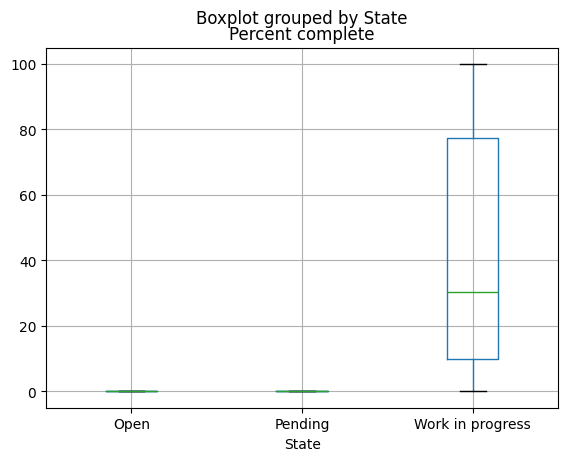

In [447]:
#Analizamos los diagrama de caja de la variable objetivo "percent complete" por cada categoria 
# de la variable independiente "State"
df.boxplot("Percent complete", by="State")

In [448]:
#Obtengo las categorías de la variable (State)
grupos=pd.unique(df['State'].values)
grupos

['Work in progress', 'Pending', 'Open']
Categories (3, object): ['Open', 'Pending', 'Work in progress']

In [449]:
#p-value < 0.05, se rechaza la hipótesis de que todas las medias son iguales
mod = ols('Q("Percent complete") ~ C(State)', data=df).fit()
anova_table = sm.stats.anova_lm(mod, typ=1)
print(anova_table)

             df         sum_sq       mean_sq         F    PR(>F)
C(State)    2.0   21169.600944  10584.800472  9.043084  0.000163
Residual  243.0  284428.034508   1170.485739       NaN       NaN


In [450]:
df["Percent complete"] = pd.to_numeric(df["Percent complete"], errors="coerce")
df["State"] = df["State"].astype("category")
df["Project Type"] = df["Project Type"].astype("category")

In [451]:
# MANOVA: ANOVA con dos variables categóricas y su interacción
#p-value < 0.05, se rechaza la hipótesis de que todas las medias son iguales
mod = ols('Q("Percent complete") ~ C(State) + C(Q("Project Type")) + C(State):C(Q("Project Type"))', data=df).fit()
anova_table = sm.stats.anova_lm(mod, typ=1)
print(anova_table)

                                  df         sum_sq       mean_sq         F  \
C(State)                         2.0   21169.600944  10584.800472  9.285982   
C(Q("Project Type"))            10.0   21088.978529   2108.897853  1.850123   
C(State):C(Q("Project Type"))   20.0   23166.775416   1158.338771  1.016204   
Residual                       231.0  263309.683907   1139.868762       NaN   

                                 PR(>F)  
C(State)                       0.000132  
C(Q("Project Type"))           0.053258  
C(State):C(Q("Project Type"))  0.443813  
Residual                            NaN  


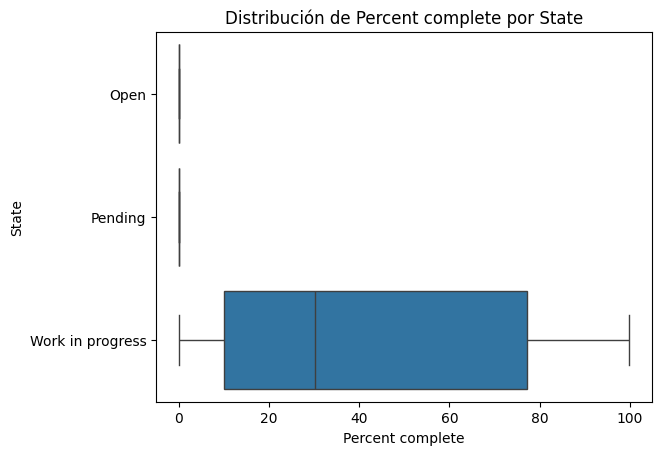

In [452]:
#Grafica variable Percent Complete vs State
sns.boxplot(data=df, x='Percent complete', y='State')
plt.title("Distribución de Percent complete por State")
plt.show()

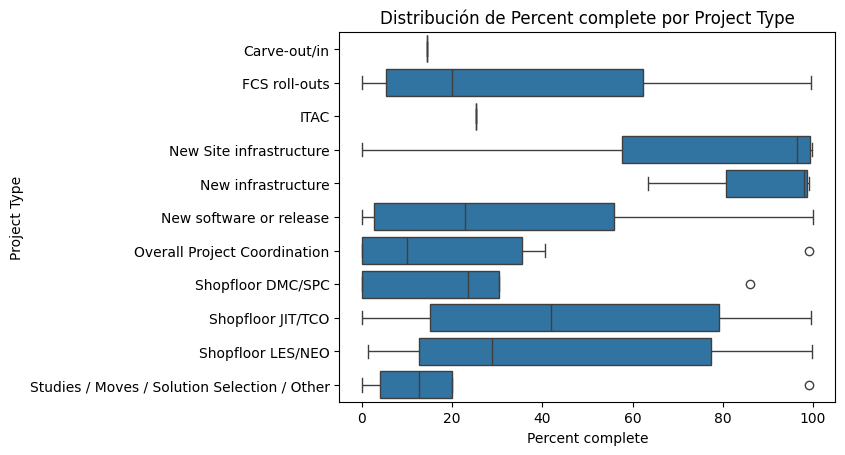

In [453]:
sns.boxplot(data=df, x='Percent complete', y='Project Type')
plt.title("Distribución de Percent complete por Project Type")
plt.show()

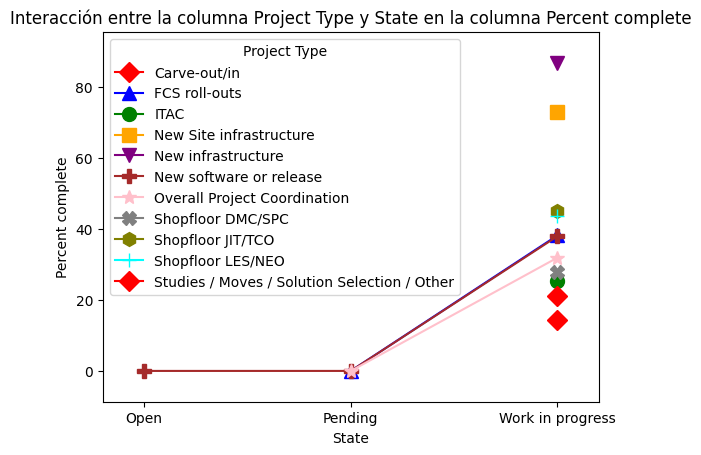

In [454]:
# ...existing code...
df["State"] = df["State"].astype(str)
df["Project Type"] = df["Project Type"].astype(str)
df["Percent complete"] = pd.to_numeric(df["Percent complete"], errors="coerce")

# Ajusta marcadores y colores según el número de categorías
n_cats = df["Project Type"].nunique()
base_markers = ['D', '^', 'o', 's', 'v', 'P', '*', 'X', 'h', '+']
base_colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

# Si hay más categorías que marcadores, repite los marcadores
if n_cats > len(base_markers):
    markers = (base_markers * ((n_cats // len(base_markers)) + 1))[:n_cats]
    colors = (base_colors * ((n_cats // len(base_colors)) + 1))[:n_cats]
else:
    markers = base_markers[:n_cats]
    colors = base_colors[:n_cats]

fig = interaction_plot(df['State'], df['Project Type'], df['Percent complete'],
                       colors=colors, markers=markers, ms=10)
plt.title("Interacción entre la columna Project Type y State en la columna Percent complete")
plt.xlabel("State")
plt.ylabel("Percent complete")
plt.show()
# ...existing code...

#  Project size

/var/folders/zv/qr2mdg5d4vs912y7pwz4l7rr0000gn/T/ipykernel_1581/4213978593.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=df, x="Project size", y="Project Type", ci=95)


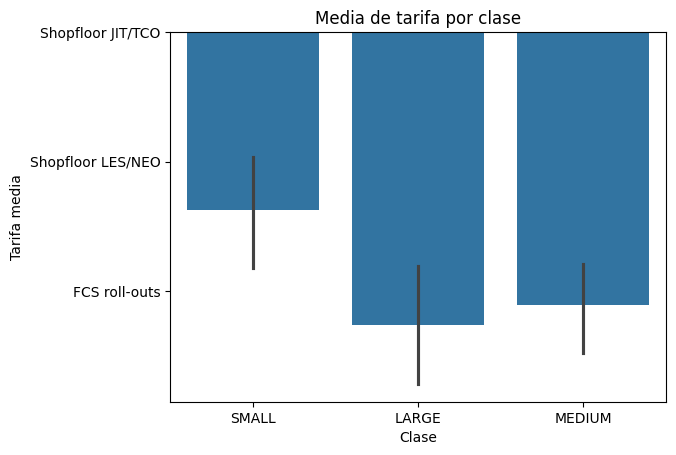

In [455]:
# Gráfico de barras con barras de error (por defecto muestra el IC al 95%)
sns.barplot(data=df, x="Project size", y="Project Type", ci=95)
plt.title("Media de tarifa por clase")
plt.ylabel("Tarifa media")
plt.xlabel("Clase")
plt.show()

In [456]:
#Obtengo las categorías de la variable (Project Type)
grupos=pd.unique(df['Project Type'].values)
grupos

array(['Shopfloor JIT/TCO', 'Shopfloor LES/NEO', 'FCS roll-outs',
       'New software or release',
       'Studies / Moves / Solution Selection / Other',
       'Overall Project Coordination', 'New Site infrastructure',
       'New infrastructure', 'Shopfloor DMC/SPC', 'ITAC', 'Carve-out/in'],
      dtype=object)

In [457]:
df["Project size_num"] = df["Project size"].astype("category").cat.codes
df["Project Type_num"] = df["Project Type"].astype("category").cat.codes

In [458]:
#p-value < 0.05, se rechaza la hipótesis de que todas las medias son iguales
mod = ols('Q("Project size_num") ~ Q("Project Type")', data=df).fit()
anova_table = sm.stats.anova_lm(mod, typ=1)
print(anova_table)

                      df      sum_sq   mean_sq         F    PR(>F)
Q("Project Type")   10.0   23.761754  2.376175  4.741425  0.000003
Residual           235.0  117.770766  0.501152       NaN       NaN


In [459]:
df["Project size_num"] = df["Project size"].astype("category").cat.codes
df["Project Type_num"] = df["Project Type"].astype("category").cat.codes
df["State_num"] = df["State"].astype("category").cat.codes

In [460]:
mod = ols('Q("Project size_num") ~ Q("State") + Q("Project Type") + Q("State_num"):Q("Project Type")', data=df).fit()
anova_table = sm.stats.anova_lm(mod, typ=1)
print(anova_table)

                                     df      sum_sq   mean_sq         F  \
Q("State")                          2.0    3.087957  1.543978  3.141577   
Q("Project Type")                  10.0   23.926099  2.392610  4.868311   
Q("State_num"):Q("Project Type")   11.0    7.523821  0.683984  1.391721   
Residual                          231.0  113.528664  0.491466       NaN   

                                    PR(>F)  
Q("State")                        0.045067  
Q("Project Type")                 0.000002  
Q("State_num"):Q("Project Type")  0.177566  
Residual                               NaN  


Convertir a string

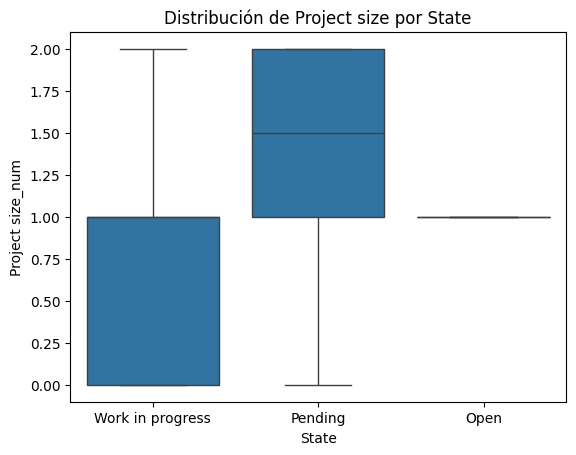

In [461]:
sns.boxplot(data=df, x='State', y='Project size_num')
plt.title("Distribución de Project size por State")
plt.show()

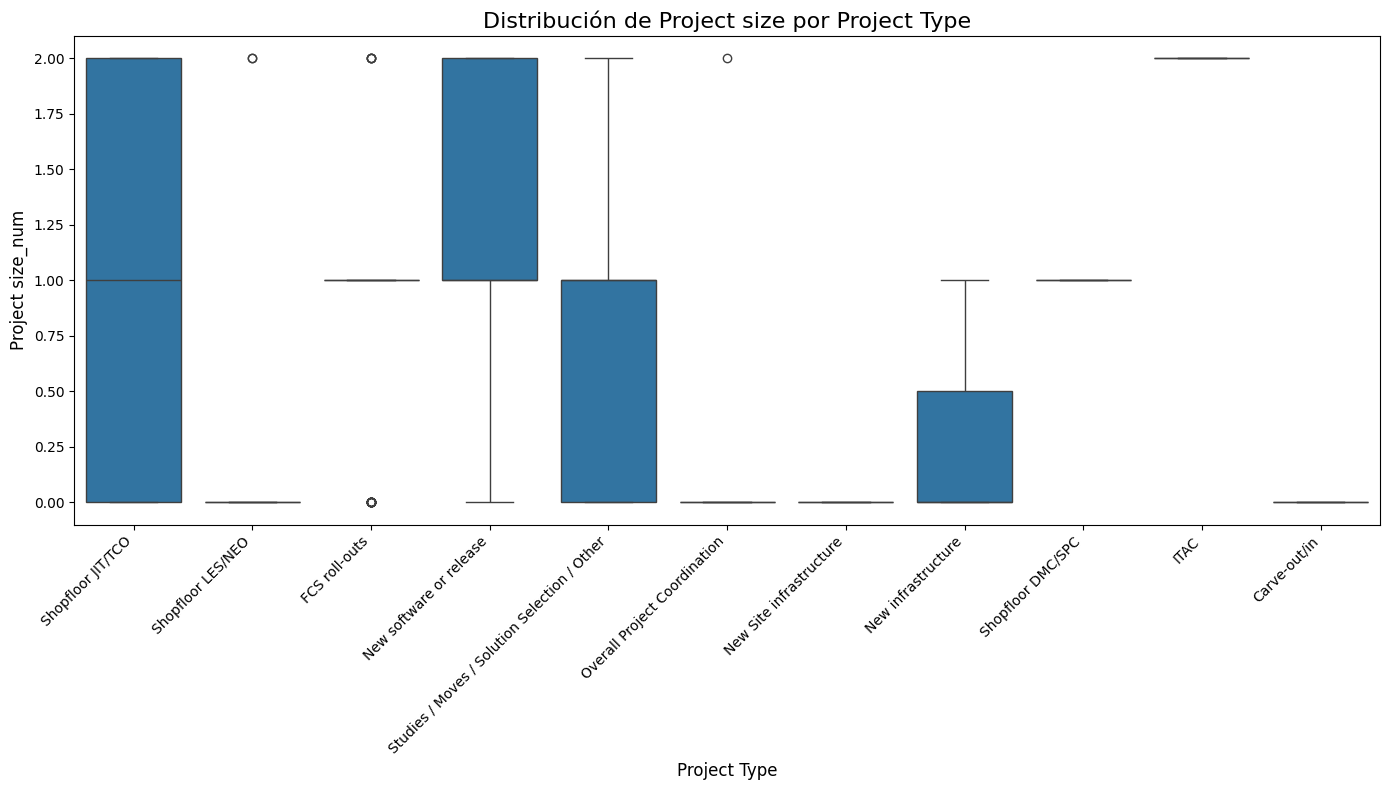

In [462]:
plt.figure(figsize=(14, 8))  
sns.boxplot(data=df, x='Project Type', y='Project size_num', orient='v')

plt.title("Distribución de Project size por Project Type", fontsize=16)
plt.xlabel("Project Type", fontsize=12)
plt.ylabel("Project size_num", fontsize=12)

plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()

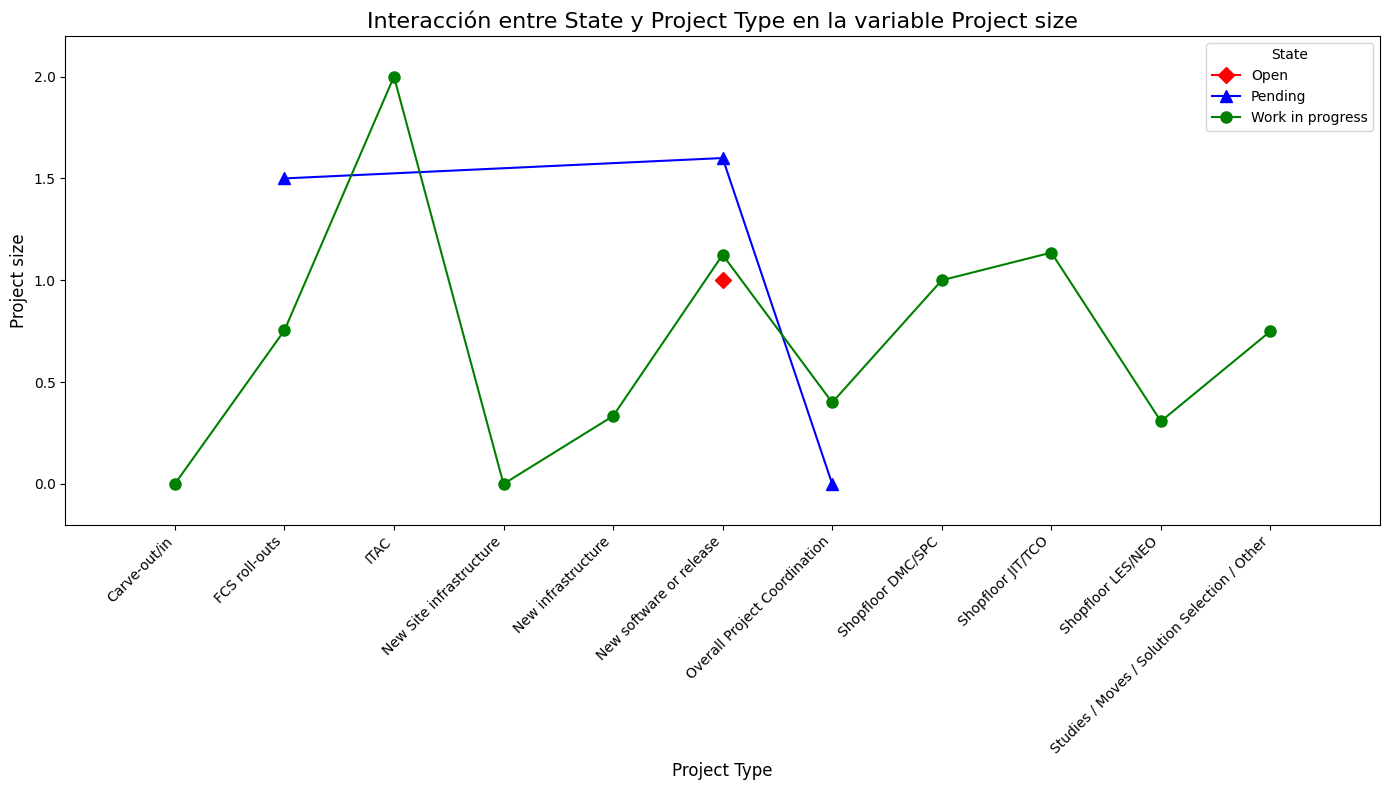

In [463]:
n_states = df["State"].nunique()
base_markers = ['D', '^', 'o', 's', 'v', 'P', '*', 'X', 'h', '+']
base_colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

markers = (base_markers * ((n_states // len(base_markers)) + 1))[:n_states]
colors = (base_colors * ((n_states // len(base_colors)) + 1))[:n_states]

df_plot = df.dropna(subset=["Project Type", "State", "Project size_num"]).copy()
df_plot["Project Type"] = df_plot["Project Type"].astype(str)
df_plot["State"] = df_plot["State"].astype(str)

fig, ax = plt.subplots(figsize=(14, 8))  
interaction_plot(
    x=df_plot["Project Type"],
    trace=df_plot["State"],
    response=df_plot["Project size_num"],
    colors=colors,
    markers=markers,
    ms=8,
    ax=ax
)

plt.title("Interacción entre State y Project Type en la variable Project size", fontsize=16)
plt.xlabel("Project Type", fontsize=12)
plt.ylabel("Project size", fontsize=12)

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Project Health

In [464]:
df["Project Health_num"] = df["Project Health"].astype("category").cat.codes
df["On-hold_num"] = df["On-hold"].astype("category").cat.codes
df["State_num"] = df["State"].astype("category").cat.codes

/var/folders/zv/qr2mdg5d4vs912y7pwz4l7rr0000gn/T/ipykernel_1581/3412149749.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=df, x="On-hold", y="Project Health_num", ci=95)


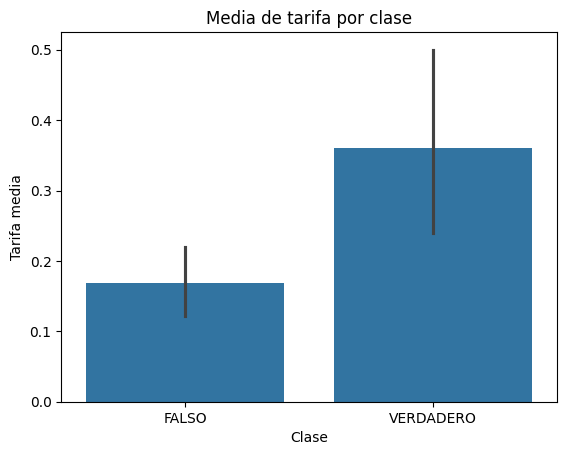

In [465]:
# Gráfico de barras con barras de error (por defecto muestra el IC al 95%)
sns.barplot(data=df, x="On-hold", y="Project Health_num", ci=95)
plt.title("Media de tarifa por clase")
plt.ylabel("Tarifa media")
plt.xlabel("Clase")
plt.show()

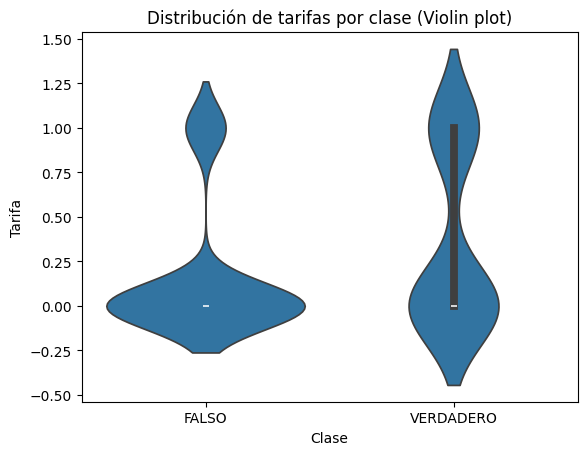

In [466]:
# Gráfico de violín
sns.violinplot(data=df, x="On-hold", y="Project Health_num", inner="box")
plt.title("Distribución de tarifas por clase (Violin plot)")
plt.ylabel("Tarifa")
plt.xlabel("Clase")
plt.show()

In [467]:
#Obtengo las categorías de la variable (State)
grupos=pd.unique(df['On-hold'].values)
grupos

array(['FALSO', 'VERDADERO'], dtype=object)

In [468]:
#p-value < 0.05, se rechaza la hipótesis de que todas las medias son iguales
mod = ols('Q("Project Health_num") ~ Q("On-hold")', data=df).fit()
anova_table = sm.stats.anova_lm(mod, typ=1)
print(anova_table)

                 df     sum_sq   mean_sq         F    PR(>F)
Q("On-hold")    1.0   1.462952  1.462952  9.161311  0.002737
Residual      244.0  38.963878  0.159688       NaN       NaN


In [469]:
#p-value < 0.05, se rechaza la hipótesis de que todas las medias son iguales
# Se puede generar un analisis MANOVA (Múltiples variables categóricas)
mod = ols('Q("Project Health_num") ~ Q("State") + Q("On-hold") + Q("State_num"):Q("On-hold")', data=df).fit()
anova_table = sm.stats.anova_lm(mod, typ=1)
print(anova_table)

                                df     sum_sq   mean_sq          F    PR(>F)
Q("State")                     2.0   0.064884  0.032442   0.203697  0.815849
Q("On-hold")                   1.0   1.654425  1.654425  10.387898  0.001444
Q("State_num"):Q("On-hold")    2.0   0.400949  0.200474   1.258750  0.285869
Residual                     241.0  38.382791  0.159265        NaN       NaN


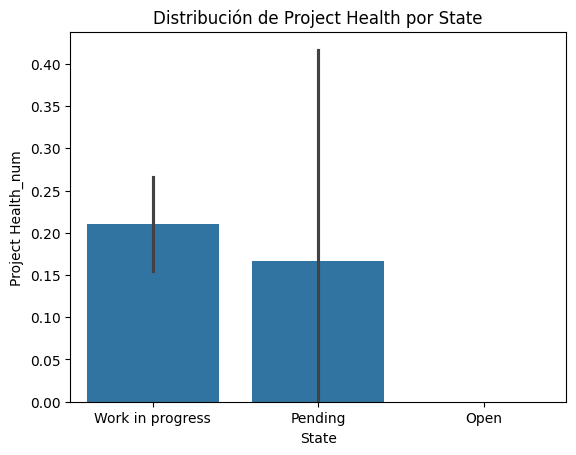

In [470]:
#Grafica variable Project Health vs State
sns.barplot(data=df, x='State', y='Project Health_num')
plt.title("Distribución de Project Health por State")
plt.show()


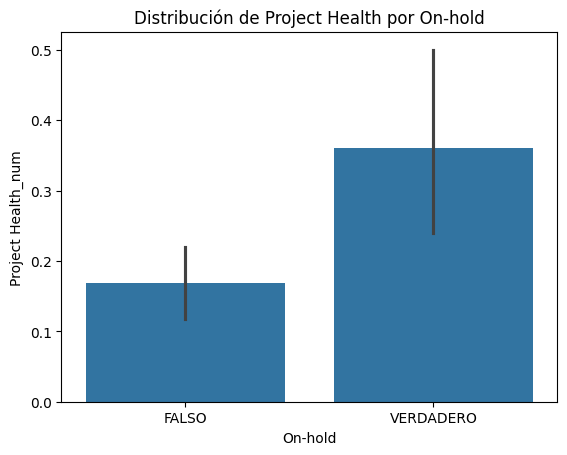

In [471]:
#Grafica variable Project Health vs State
sns.barplot(data=df, x='On-hold', y='Project Health_num')
plt.title("Distribución de Project Health por On-hold")
plt.show()

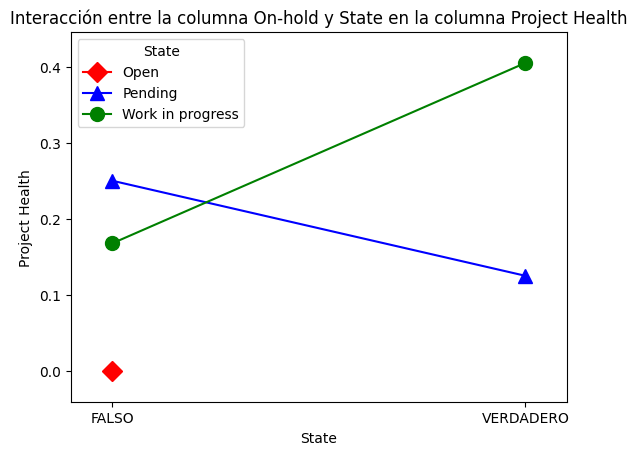

In [472]:
n_domains = df["State"].nunique()
base_markers = ['D', '^', 'o', 's', 'v', 'P', '*', 'X', 'h', '+']
base_colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

markers = (base_markers * ((n_domains // len(base_markers)) + 1))[:n_domains]
colors = (base_colors * ((n_domains // len(base_colors)) + 1))[:n_domains]

fig = interaction_plot(df['On-hold'], df['State'], df['Project Health_num'],
                       colors=colors, markers=markers, ms=10)
plt.title("Interacción entre la columna On-hold y State en la columna Project Health")
plt.xlabel("State")
plt.ylabel("Project Health")
plt.show()

# Project type

In [473]:
#Inmuebles['Columna']=Inmuebles['Columna'].str.replace('%', '')

In [474]:
df["Project type_num"] = df["Project Type"].astype("category").cat.codes

In [475]:
df["BG_cat"] = df["BG"].astype("category")
df["Project target phase_cat"] = df["Project target phase"].astype("category")

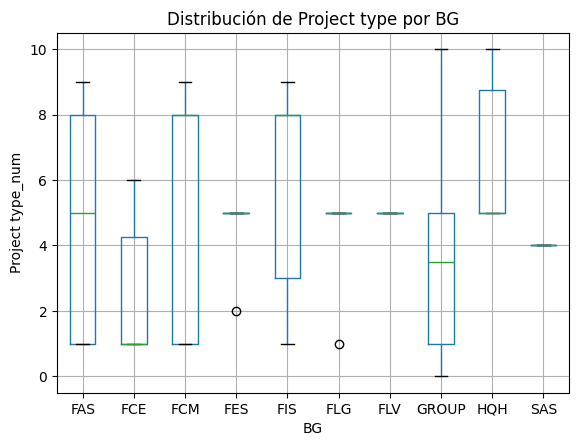

In [476]:
df.boxplot(column="Project type_num", by="BG_cat")
plt.title("Distribución de Project type por BG")
plt.suptitle("")  # Quita el título automático de pandas
plt.xlabel("BG")
plt.ylabel("Project type_num")
plt.show()


In [477]:
#Obtengo las categorías de la variable (pclass)
grupos=pd.unique(df['BG_cat'].values)
grupos

['FIS', 'FCM', 'GROUP', 'FAS', 'FCE', 'FES', 'HQH', 'FLV', 'FLG', 'SAS']
Categories (10, object): ['FAS', 'FCE', 'FCM', 'FES', ..., 'FLV', 'GROUP', 'HQH', 'SAS']

In [478]:
#p-value < 0.05, se rechaza la hipótesis de que todas las medias son iguales
mod = ols('Q("Project type_num") ~ Q("BG_cat")', data=df).fit()
anova_table = sm.stats.anova_lm(mod, typ=1)
print(anova_table)

                df       sum_sq    mean_sq         F    PR(>F)
Q("BG_cat")    9.0   234.459794  26.051088  2.806317  0.003786
Residual     236.0  2190.792239   9.283018       NaN       NaN


In [479]:
#p-value < 0.05, se rechaza la hipótesis de que todas las medias son iguales
# Se puede generar un analisis MANOVA (Múltiples variables categóricas)
mod = ols('Q("Project type_num") ~ Q("Project target phase_cat") + Q("BG_cat") + Q("Project target phase_cat"):Q("BG_cat")', data=df).fit()
anova_table = sm.stats.anova_lm(mod, typ=1)
print(anova_table)

                                              df       sum_sq    mean_sq  \
Q("Project target phase_cat")                2.0    25.565059  12.782530   
Q("BG_cat")                                  9.0   218.568586  24.285398   
Q("Project target phase_cat"):Q("BG_cat")   18.0   239.044773  13.280265   
Residual                                   226.0  2124.318796   9.399641   

                                                  F    PR(>F)  
Q("Project target phase_cat")              1.359896  0.258780  
Q("BG_cat")                                2.583652  0.007499  
Q("Project target phase_cat"):Q("BG_cat")  1.412848  0.126610  
Residual                                        NaN       NaN  


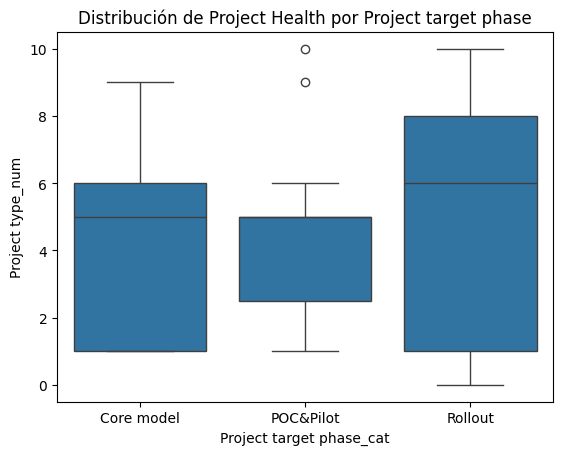

In [480]:
#Grafica variable Project type vs Project target phase
sns.boxplot(data=df, x='Project target phase_cat', y='Project type_num')
plt.title("Distribución de Project Health por Project target phase")
plt.show()

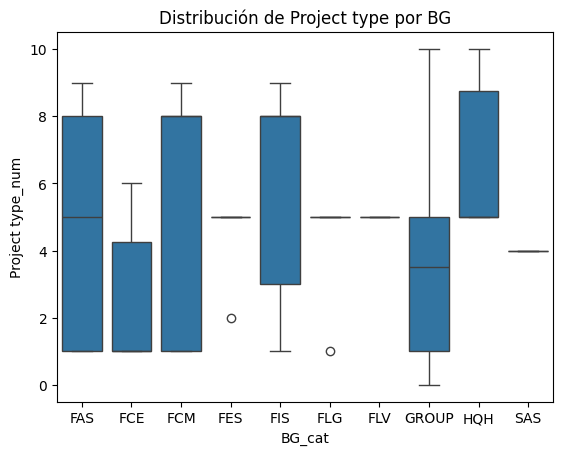

In [481]:
#Grafica variable Project type vs BG
sns.boxplot(data=df, x='BG_cat', y='Project type_num')
plt.title("Distribución de Project type por BG")
plt.show()

In [482]:
df["BG_str"] = df["BG_cat"].astype(str)
df["Phase_str"] = df["Project target phase_cat"].astype(str)

In [483]:
trace_levels = df["Phase_str"].unique()
n_trace_levels = len(trace_levels)

In [484]:
base_markers = ['D', '^', 'o', 's', 'v', 'P', '*', 'X', 'h', '+']
base_colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
markers = (base_markers * ((n_trace_levels // len(base_markers)) + 1))[:n_trace_levels]
colors = (base_colors * ((n_trace_levels // len(base_colors)) + 1))[:n_trace_levels]

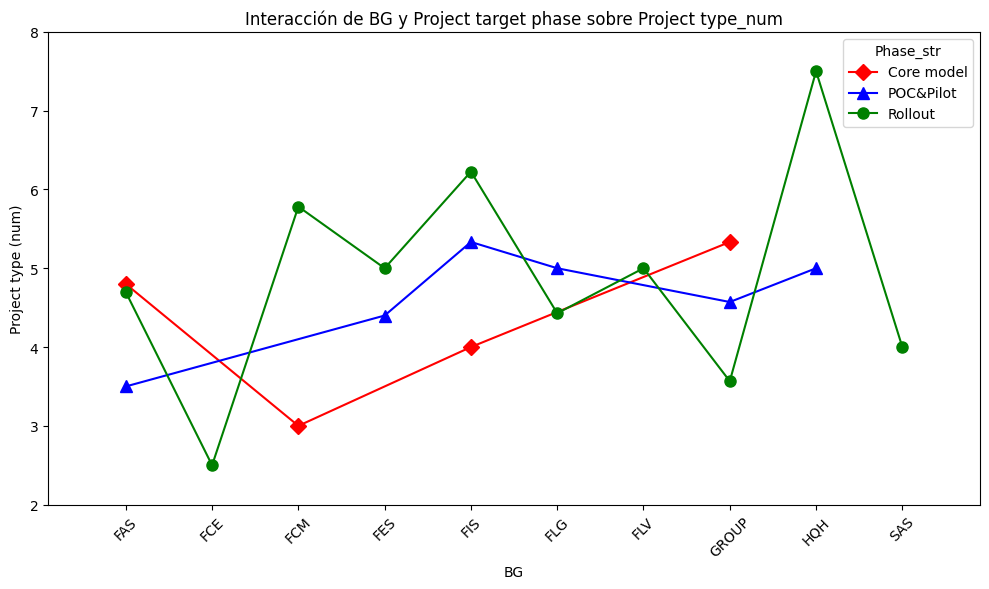

In [487]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
interaction_plot(
    x=df["BG_str"],
    trace=df["Phase_str"],
    response=df["Project type_num"],
    colors=colors,
    markers=markers,
    ms=8,
    ax=ax
)

plt.title("Interacción de BG y Project target phase sobre Project type_num")
plt.xlabel("BG")
plt.ylabel("Project type (num)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
